# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
w, b = np.polyfit( X_train.flatten(),y_train,deg=1)
print(w,b, "\n")
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn
def mse(true, pred):    
    return np.mean((true - pred)**2)

def mae(true, pred):    
    return np.mean(np.abs(true - pred))
y_predicted =  w * X_test + b

print('sklearn mse', mean_squared_error(y_test, y_predicted))
print('mse', mse(y_test, y_predicted.flatten()), "\n")

print('sklearn mae', mean_absolute_error(y_test, y_predicted))
print('mae', mae(y_test, y_predicted.flatten()), "\n")


9.632745879595188 -5.451705153968219 

sklearn mse 116.1315227703295
mse 116.1315227703295 

sklearn mae 8.48428548169317
mae 8.48428548169317 



**Правка** \
Задание 1. Вам нужно сравнивать модели, а не реализации функций расчета ошибок.


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted_linear = model.predict(X_test)
print('linear model mae, mse: ')
print(mean_absolute_error(y_predicted_linear, y_test))
print(mean_squared_error(y_predicted_linear, y_test))
print('my MNK mae, mse: ')
print(mean_absolute_error(y_predicted, y_test))
print(mean_squared_error(y_predicted, y_test))

linear model mae, mse: 
8.484285481693169
116.1315227703295
MNK mae, mse: 
8.48428548169317
116.1315227703295


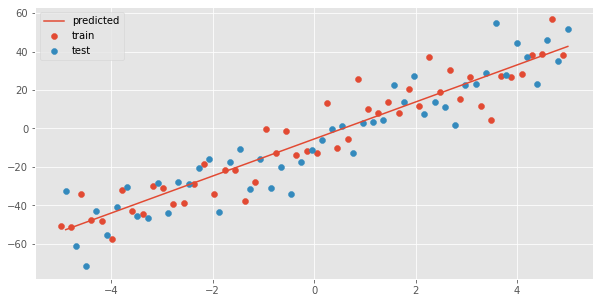

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X[1::2], X[1::2].reshape(-1, 1).dot(w) + b, label='predicted')
plt.legend()
plt.show()

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
w, b = np.polyfit(data['x_train'], data['y_train'], deg=1)
print(w, b)
y_predicted = w * (data['support']) + b
### Найдите значения метрик MSE и MAE
print('mse: ', mean_squared_error(data['values'],y_predicted))
print('mae: ', mean_absolute_error(data['values'],y_predicted))

-0.3036265648664744 1.9767652568982146
mse:  0.19727741033195903
mae:  0.3914136179786573


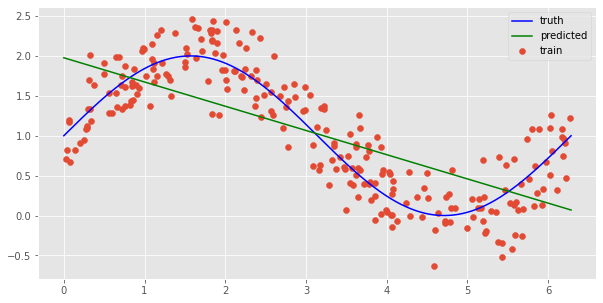

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(data['x_train'], data['y_train'], label='train')
plt.plot(data['support'], data['values'], 'b',label='truth')
plt.plot(data['support'], y_predicted, 'g', label='predicted')
plt.legend()
plt.show()

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

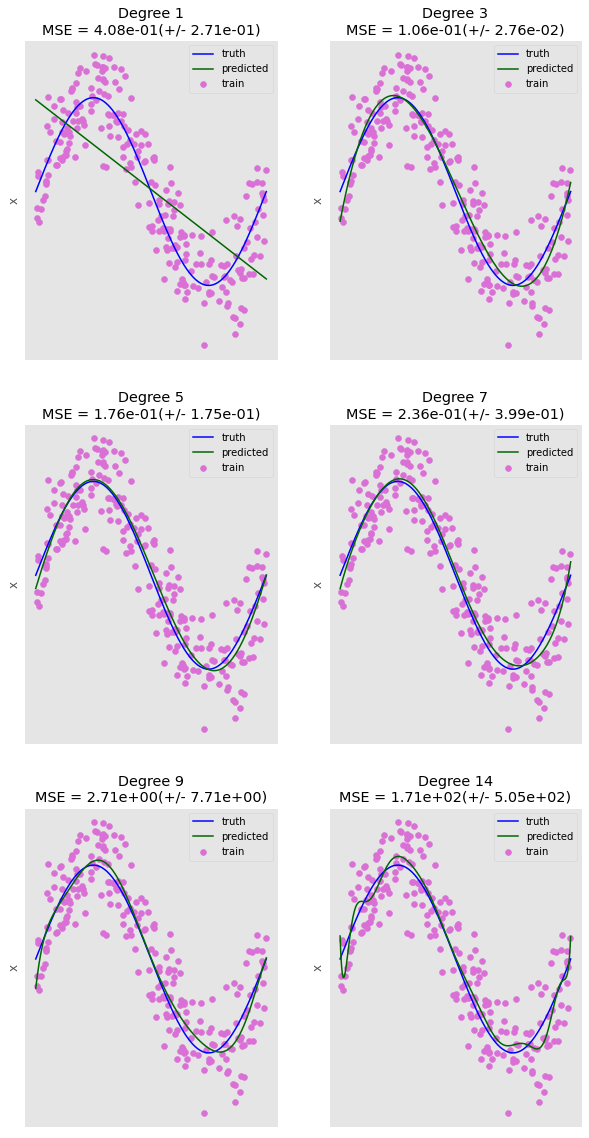

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 

degrees = [1, 2, 4, 6, 8,  15]


x_train = data['x_train']
y_train = data['y_train']
x_test = data['support']
y_test = data['values']


fig = plt.figure(figsize=(10, 20))
for i in range(len(degrees)):
  ax = fig.add_subplot(3, 2, i+1)
  plt.setp(ax, xticks=(), yticks=())

  polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
  pipeline.fit(x_train[:, np.newaxis], y_train)

  # Evaluate the models using crossvalidation
  scores = cross_val_score(pipeline, x_train[:, np.newaxis], y_train,
                             scoring="neg_mean_squared_error", cv=10)

  plt.scatter(x_train, y_train,color='orchid', label='train')
  plt.plot(x_test, y_test, 'b',label='truth')
  plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]), 'darkgreen', label="predicted")
  plt.legend(loc='best')
  plt.ylabel("y")
  plt.ylabel("x")
  plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

### Полином какой степени подходит больше других? Почему?

**Вывод**
Из визуализации приведенной выше видно что полиномы 4,6 степени походят лучше всего(они ближе всех к реальным значениям и их mse минимально).У полиномов с маленькой степенью, значение ошибки не достаточно маленькое, что означает что модель слишком простая(underfitting), а у полиномов большой степени значение ошибки слишком велико, что означает что наша модель слишком сильно подстроилась под наши данные (overfitting).

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston


In [ ]:
house_data = load_boston()
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

## Задание 3.4

In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##полный датасет
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)

print('Test MAE: ', mean_absolute_error(y_train, y_train_prediction)) 
print('Test MSE: ', mean_squared_error(y_train, y_train_prediction))

Test MAE:  3.336873508413259
Test MSE:  23.225886469634222


In [ ]:
#усеченный датасет 
top_7  = np.argpartition(np.abs(model.coef_), 7)[-7:]
X_train = X_train[:, top_7]

model = LinearRegression()

model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)

print('Test MAE: ', mean_absolute_error(y_train, y_train_prediction)) 
print('Test MSE: ', mean_squared_error(y_train, y_train_prediction))

Test MAE:  3.5719032614719213
Test MSE:  25.938972813066872


**Вывод**
Значения метрик качества полного датасета немного меньше значений метрик качества усечнного датасета, это свидетельствует о том что произошла потеря точности из-за усечния. С другой стороны модель стала проще из-за того что мы оставили только 7 значимых признаков.